In [1]:
import sys
import os

# Ruta al directorio raíz del proyecto (ajústala si es necesario)
ruta_raiz = os.path.abspath(r"C:\Users\Germán Llorente\Desktop\germiprogramer\TFG-Agente-de-Scouting")

if ruta_raiz not in sys.path:
    sys.path.append(ruta_raiz)

In [2]:
import importlib
import funciones_analisis.estadisticas

importlib.reload(funciones_analisis.estadisticas)
importlib.reload(funciones_analisis.generales)

from funciones_analisis.estadisticas import *
from funciones_analisis.generales import *
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch, Pitch
from highlight_text import ax_text, fig_text
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import seaborn as sns
import glob

In [3]:
# Cargar los datasets
jugadores_laliga = pd.read_csv('datos/datos_jugadores_v3/jugadores_laliga.csv', encoding="utf-8", skipinitialspace=True)
jugadores_premier = pd.read_csv('datos/datos_jugadores_v3/jugadores_premier.csv')
jugadores_seriea = pd.read_csv('datos/datos_jugadores_v3/jugadores_seriea.csv')
jugadores_bundesliga = pd.read_csv('datos/datos_jugadores_v3/jugadores_bundesliga.csv')

In [4]:
for i, df in enumerate([jugadores_laliga, jugadores_premier, jugadores_seriea, jugadores_bundesliga], start=1):
    print(f"\nDataset {i} columnas:")
    print(list(df.columns))



Dataset 1 columnas:
['player_id', 'player_name', 'team', 'team_id', 'posiciones', 'partidos_jugados', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_jersey_number', 'club_loaned_from', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'preferred_foot', 'release_clause_eur', 'competition', 'tackle_success_rate', 'tackles_successful', 'interception_success_rate', 'interceptions', 'clearances', 'blocks', 'head_clearances', 'head_clearances_won', 'head_clearance_success_rate', 'headed_shots_total', 'headed_shots_after_duel', 'headed_shot_duel_rate', 'total_passes', 'completed_passes', 'incomplete_passes', 'passes_out', 'offside_passes', 'failed_passes', 'pass_completion_rate', 'avg_pass_length', 'ground_passes', 'low_passes', 'high_passes', 'ground_pass_percentage', 'low_pass_percentage', 'high_pass_percentage', 'crosses_total', 'crosses_completed', 'cutbacks_total', 'cutbacks_completed', 'switches_total', 'switches_complete

In [5]:
# Unir todos los datasets (uno debajo del otro)
jugadores_total = pd.concat([jugadores_laliga, jugadores_premier, jugadores_seriea, jugadores_bundesliga])
jugadores_total

,player_id,player_name,team,team_id,posiciones,partidos_jugados,overall,potential,value_eur,wage_eur,...,key_passes_per90,chances_created_per90,goals_conceded_per90,xg_total_per90,goals_minus_xg_per90,PSxG_per90,psxg_minus_goals_conceded_per90,yellow_cards_per90,red_cards_per90,posicion_mas_jugada
0,3023,Yuri Berchiche Izeta,Real Sociedad,210,['Left Back'],21,71,76,1800000.0,20000.0,...,0.598772,0.783009,0.000000,0.017631,-0.017503,0.000000,0.000000,0.460594,0.0,Left Back
1,3063,Danilo Luiz da Silva,Real Madrid,220,"['Right Back', 'Left Back', 'Right Wing']",24,80,86,16500000.0,90000.0,...,0.505618,0.716292,0.000000,0.040390,0.043820,0.000000,0.000000,0.252809,0.0,Right Back
2,3084,Christian Atsu Twasam,Málaga,223,"['Left Midfield', 'Right Midfield', 'Left Cent...",11,63,69,375000.0,4000.0,...,1.956522,1.956522,0.000000,0.410496,0.241304,0.000000,0.000000,0.000000,0.0,Right Midfield
3,3130,Gaël Kakuta,Sevilla,213,"['Left Midfield', 'Right Wing']",2,76,78,6500000.0,60000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.967742,0.0,Left Midfield
4,3160,Rene Krhin,Granada,1049,"['Right Defensive Midfield', 'Left Defensive M...",23,75,80,4500000.0,35000.0,...,0.240642,0.240642,0.000000,0.031147,-0.031283,0.000000,0.000000,0.180481,0.0,Right Defensive Midfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,400621,Tohouri Zahoui Constant Djakpa,Eintracht Frankfurt,184,"['Left Back', 'Left Wing Back', 'Left Midfield...",11,75,75,3100000.0,40000.0,...,0.851351,0.851351,0.000000,0.019767,-0.019459,0.000000,0.000000,0.243243,0.0,Left Back
424,400622,Joel Gerezgiher,Eintracht Frankfurt,184,['Left Midfield'],3,60,72,300000.0,2000.0,...,0.978261,0.978261,0.000000,0.304519,-0.303261,0.000000,0.000000,0.978261,0.0,Left Midfield
425,400627,Dario Kresic,Bayer Leverkusen,904,['Goalkeeper'],1,68,68,675000.0,10000.0,...,0.000000,0.000000,1.914894,0.000000,0.000000,1.780851,-0.134043,0.000000,0.0,Goalkeeper
426,400654,Roel Brouwers,Borussia Mönchengladbach,185,"['Right Center Back', 'Left Center Back', 'Rig...",8,76,76,2300000.0,50000.0,...,0.000000,0.000000,0.000000,0.025924,-0.025806,0.000000,0.000000,0.000000,0.0,Right Center Back


In [6]:
import pandas as pd

# Lista de (player_id, team) válidos
ids_y_equipos_validos = [
    (3083, "Tottenham Hotspur"),
    (3089, "Manchester City"),
    (3302, "Watford"),
    (5474, "Inter Milan"),
    (5687, "Eibar"),
    (6593, "Real Betis"),
    (6743, "Rayo Vallecano"),
    (6950, "Swansea City"),
    (7141, "Levante UD"),
    (7170, "Carpi"),
    (7788, "Torino"),
    (7852, "Genoa"),
    (8217, "Juventus"),
    (9461, "Norwich City"),
    (10881, "Sevilla"),
    (17520, "VfB Stuttgart"),
    (18404, "Rayo Vallecano"),
    (23488, "Watford"),
    (26211, "Levante UD"),
    (27341, "Celta Vigo"),
    (27853, "Fiorentina"),
]

# Convertir a DataFrame
df_validos = pd.DataFrame(ids_y_equipos_validos, columns=['player_id', 'team'])

# Filtrar duplicados por player_id
duplicados = jugadores_total[jugadores_total.duplicated(subset='player_id', keep=False)]

# Mantener solo los duplicados correctos (player_id + team que coincidan con la lista)
duplicados_validos = duplicados.merge(df_validos, on=['player_id', 'team'])

# Mantener los jugadores únicos que no están duplicados
no_duplicados = jugadores_total[~jugadores_total['player_id'].isin(duplicados['player_id'])]

# Unir los válidos con los no duplicados
jugadores_total = pd.concat([no_duplicados, duplicados_validos], ignore_index=True)

# Ver resultado



In [7]:
# Filtrar jugadores que están cedidos (club_loaned_from no es NaN)
cedidos = jugadores_total[jugadores_total['club_loaned_from'].notna()]

# Mostrar algunas columnas relevantes
print(cedidos[['player_id', 'player_name', 'team', 'club_loaned_from']])


      player_id                    player_name                    team  \
10         3379                Alphonse Areola              Villarreal   
23         4418           Matheus Dória Macedo                 Granada   
65         5678   Jefferson Andrés Lerma Solís              Levante UD   
68         5719        Marco Asensio Willemsen                Espanyol   
70         5724                    Fayçal Fajr  RC Deportivo La Coruña   
...         ...                            ...                     ...   
1738      10902                Philipp Hosiner                 FC Köln   
1782      16502            László Kleinheisler           Werder Bremen   
1889       6743  Manuel Rolando Iturra Urrutia          Rayo Vallecano   
1890       7141                 Giuseppe Rossi              Levante UD   
1899       9461                     Timm Klose            Norwich City   

            club_loaned_from  
10       Paris Saint-Germain  
23    Olympique de Marseille  
65            Atlé

In [8]:
jugadores_total["team"].unique()

array(['Real Sociedad', 'Real Madrid', 'Málaga', 'Sevilla', 'Granada',
       'Valencia', 'Villarreal', 'Barcelona', 'Real Betis', 'Las Palmas',
       'Athletic Club', 'Rayo Vallecano', 'Espanyol', 'Atlético Madrid',
       'Celta Vigo', 'RC Deportivo La Coruña', 'Levante UD', 'Eibar',
       'Sporting Gijón', 'Getafe', 'Chelsea', 'West Bromwich Albion',
       'Manchester United', 'Tottenham Hotspur', 'Aston Villa',
       'Newcastle United', 'AFC Bournemouth', 'Manchester City',
       'West Ham United', 'Crystal Palace', 'Southampton', 'Sunderland',
       'Everton', 'Swansea City', 'Watford', 'Stoke City',
       'Leicester City', 'Norwich City', 'Liverpool', 'Arsenal', 'Torino',
       'Lazio', 'Fiorentina', 'AS Roma', 'AC Milan', 'Empoli', 'Genoa',
       'Inter Milan', 'Juventus', 'Atalanta', 'Udinese', 'Napoli',
       'Sassuolo', 'Hellas Verona', 'Palermo', 'Sampdoria', 'Bologna',
       'Chievo', 'Carpi', 'Frosinone', 'Ingolstadt', 'Hannover 96',
       'Schalke 04', 'Bayer 

In [9]:
jugadores_total["club_loaned_from"].unique()

array([nan, 'Paris Saint-Germain', 'Olympique de Marseille',
       'Atlético Huila', 'Real Madrid CF', 'Elche CF', 'AC Milan',
       'SC Braga', 'Atlético de Madrid', 'Rubin Kazan', 'Granada CF',
       'Derby County', 'Valencia CF', 'FC Porto', 'Watford', 'SL Benfica',
       'Roma', 'FC Barcelona', 'Inter', 'Liverpool', 'Galatasaray SK',
       'SV Werder Bremen', 'Villarreal CF', "CD O'Higgins", 'Sporting CP',
       'Celtic', 'Udinese Calcio', 'Cruz Azul', 'Norwich City',
       'Sunderland', 'Swansea City', 'AS Monaco', 'Tottenham Hotspur',
       'Chelsea', 'Stade Rennais FC', 'Fulham', 'Arsenal',
       'West Ham United', 'VfB Stuttgart', 'Zenit St. Petersburg',
       'Borussia Dortmund', 'U.S. Sassuolo Calcio', 'Palermo', 'Pescara',
       'Napoli', 'U.C. Sampdoria', 'Genoa', 'Juventus', 'Cagliari',
       'Grasshopper Club Zürich', 'FC Sion', 'Fenerbahçe SK',
       'Hellas Verona', 'Standard de Liège', 'Club Brugge KV',
       'Sevilla FC', 'Bologna', 'FC Bayern München',


In [10]:
import numpy as np

# Función para truncar a 2 decimales (sin redondear) y formatear como string con dos decimales
def truncar_y_formatear(x):
    return f"{np.floor(x * 100) / 100:.2f}"

# Detectar columnas numéricas con decimales (float)
columnas_decimales = jugadores_total.select_dtypes(include='float').columns

# Aplicar el truncado y formateo
for col in columnas_decimales:
    jugadores_total[col] = jugadores_total[col].apply(truncar_y_formatear)

# Ver resultado en las columnas modificadas
print(jugadores_total[columnas_decimales].head())


     value_eur  wage_eur club_jersey_number club_contract_valid_until  \
0   1800000.00  20000.00              19.00                   2016.00   
1  16500000.00  90000.00              23.00                   2021.00   
2    375000.00   4000.00              27.00                   2016.00   
3   6500000.00  60000.00              12.00                   2019.00   
4   4500000.00  35000.00              21.00                   2019.00   

  release_clause_eur tackle_success_rate interception_success_rate  \
0                nan               56.86                     62.75   
1                nan               64.18                     61.11   
2                nan               66.67                     66.67   
3                nan              100.00                      0.00   
4                nan               64.70                     71.05   

  head_clearance_success_rate headed_shot_duel_rate pass_completion_rate  ...  \
0                       51.43                  0.00        

In [11]:
#jugadores_total.to_csv("datos/datos_jugadores_v3/jugadores_total.csv")

In [12]:
df_ratings = pd.read_csv("datos/datos_jugadores_v3/jugadores_mundial.csv")

In [13]:
df_ratings

,Unnamed: 0,competition,date,match,team,pos,pos_role,player_name,match_id,minutes_played,...,key_passes_per90,chances_created_per90,goals_conceded_per90,xg_total_per90,goals_minus_xg_per90,PSxG_per90,psxg_minus_goals_conceded_per90,yellow_cards_per90,red_cards_per90,posicion_mas_jugada
0,4886,World Cup 2018,2018-07-03,"Colombia - England, 1 - 1",Colombia,DF,DC,Davinson Sánchez Mina,7585,120,...,0.000000,0.000000,0.0,0.138741,-0.135000,0.0,0.0,0.000000,0.0,Left Center Back
1,4890,World Cup 2018,2018-07-03,"Colombia - England, 1 - 1",Colombia,DF,DC,Yerry Fernando Mina González,7585,120,...,0.000000,0.000000,0.0,0.127085,0.622500,0.0,0.0,0.000000,0.0,Right Center Back
2,4893,World Cup 2018,2018-07-03,"Colombia - England, 1 - 1",Colombia,DF,DL,Johan Andrés Mojica Palacio,7585,120,...,1.500000,1.500000,0.0,0.004635,-0.007500,0.0,0.0,0.000000,0.0,Left Back
3,4897,World Cup 2018,2018-07-03,"Colombia - England, 1 - 1",Colombia,DF,DR,Santiago Arias Naranjo,7585,116,...,0.775862,0.775862,0.0,0.000000,0.000000,0.0,0.0,0.775862,0.0,Right Back
4,4901,World Cup 2018,2018-07-03,"Colombia - England, 1 - 1",Colombia,FW,FW,Juan Guillermo Cuadrado Bello,7585,120,...,2.250000,3.000000,0.0,0.076088,-0.075000,0.0,0.0,0.750000,0.0,Right Wing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,3024,World Cup 2018,2018-06-25,"Saudi Arabia - Egypt, 2 - 1",Saudi Arabia,MF,MC,Hussain Al Mogahwi,7559,90,...,2.000000,2.000000,0.0,0.169422,-0.170000,0.0,0.0,0.000000,0.0,Right Center Midfield
1702,3026,World Cup 2018,2018-06-25,"Saudi Arabia - Egypt, 2 - 1",Saudi Arabia,MF,MC,Salman Mohammed Al Faraj,7559,90,...,5.000000,5.000000,0.0,0.969338,0.030000,0.0,0.0,0.000000,0.0,Left Center Midfield
1703,3029,World Cup 2018,2018-06-25,"Saudi Arabia - Egypt, 2 - 1",Saudi Arabia,MF,ML,Salem Mohammed Al Dawsari,7559,90,...,2.000000,2.000000,0.0,0.196278,0.800000,0.0,0.0,0.000000,0.0,Left Midfield
1704,3032,World Cup 2018,2018-06-25,"Saudi Arabia - Egypt, 2 - 1",Saudi Arabia,MF,MR,Hattan Babhir,7559,65,...,0.000000,0.000000,0.0,0.116950,-0.110769,0.0,0.0,0.000000,0.0,Right Midfield


In [14]:
jugadores_total.rename(columns={'posicion_mas_jugada': 'main_position'}, inplace=True)
df_ratings.rename(columns={'posicion_mas_jugada': 'main_position'}, inplace=True)

In [15]:
df_ratings[df_ratings["main_position"] == "Goalkeeper"]


,Unnamed: 0,competition,date,match,team,pos,pos_role,player_name,match_id,minutes_played,...,key_passes_per90,chances_created_per90,goals_conceded_per90,xg_total_per90,goals_minus_xg_per90,PSxG_per90,psxg_minus_goals_conceded_per90,yellow_cards_per90,red_cards_per90,main_position
6,4909,World Cup 2018,2018-07-03,"Colombia - England, 1 - 1",Colombia,GK,GK,David Ospina Ramírez,7585,90,...,0.0,0.0,1.000000,0.0,0.0,0.793316,-0.210000,0.0,0.0,Goalkeeper
20,4967,World Cup 2018,2018-07-03,"Colombia - England, 1 - 1",England,GK,GK,Jordan Pickford,7585,90,...,0.0,0.0,1.000000,0.0,0.0,0.227255,-0.770000,0.0,0.0,Goalkeeper
34,3903,World Cup 2018,2018-06-28,"England - Belgium, 0 - 1",Belgium,GK,GK,Thibaut Courtois,7570,90,...,0.0,0.0,0.000000,0.0,0.0,0.460367,0.460000,0.0,0.0,Goalkeeper
48,3963,World Cup 2018,2018-06-28,"England - Belgium, 0 - 1",England,GK,GK,Jordan Pickford,7570,90,...,0.0,0.0,1.000000,0.0,0.0,0.152233,-0.850000,0.0,0.0,Goalkeeper
62,5049,World Cup 2018,2018-07-03,"Sweden - Switzerland, 1 - 0",Sweden,GK,GK,Robin Olsen,7586,90,...,0.0,0.0,0.000000,0.0,0.0,0.087946,0.090000,0.0,0.0,Goalkeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,3387,World Cup 2018,2018-06-26,"Denmark - France, 0 - 0",France,MF,DMC,Steve Mandanda,7563,90,...,0.0,0.0,0.000000,0.0,0.0,0.008513,0.010000,0.0,0.0,Goalkeeper
1658,2743,World Cup 2018,2018-06-24,"Japan - Senegal, 2 - 2",Japan,GK,GK,Eiji Kawashima,7556,90,...,0.0,0.0,2.000000,0.0,0.0,0.923394,-1.080000,0.0,0.0,Goalkeeper
1673,2790,World Cup 2018,2018-06-24,"Japan - Senegal, 2 - 2",Senegal,MF,MC,Khadim N''Diaye,7556,81,...,0.0,0.0,2.222222,0.0,0.0,0.909205,-1.311111,0.0,0.0,Goalkeeper
1685,2984,World Cup 2018,2018-06-25,"Saudi Arabia - Egypt, 2 - 1",Egypt,GK,GK,Essam Kamal Tawfik El Hadary,7559,90,...,0.0,0.0,2.000000,0.0,0.0,1.898497,-0.100000,0.0,0.0,Goalkeeper


In [16]:
jugadores_total["minutes_played"] = pd.to_numeric(jugadores_total["minutes_played"], errors="coerce")
jugadores_total["aerial_dominance_index_per90"] = pd.to_numeric(jugadores_total["aerial_dominance_index"], errors="coerce")

df_ratings["minutes_played"] = pd.to_numeric(df_ratings["minutes_played"], errors="coerce")
df_ratings["aerial_dominance_index_per90"] = pd.to_numeric(df_ratings["aerial_dominance_index"], errors="coerce")




C:\Users\Germán Llorente\AppData\Local\Temp\ipykernel_29492\900931858.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  jugadores_total["aerial_dominance_index_per90"] = pd.to_numeric(jugadores_total["aerial_dominance_index"], errors="coerce")


In [17]:
df_ratings["main_position"].unique()

array(['Left Center Back', 'Right Center Back', 'Left Back', 'Right Back',
       'Right Wing', 'Center Forward', 'Goalkeeper',
       'Center Attacking Midfield', 'Right Center Midfield',
       'Left Center Midfield', 'Left Defensive Midfield',
       'Left Center Forward', 'Center Back', 'Right Center Forward',
       'Center Defensive Midfield', 'Left Midfield', 'Right Midfield',
       'Left Wing', 'Right Attacking Midfield', 'Center Midfield',
       'Left Wing Back', 'Right Wing Back', 'Right Defensive Midfield',
       'Left Attacking Midfield'], dtype=object)

In [18]:
goalkeeper = ["Goalkeeper"]
center_back = ['Center Back', 'Right Center Back', 'Left Center Back']
side_back = ['Left Back', 'Right Back', 'Right Wing Back', 'Left Wing Back']
defensive_midfield = ['Right Defensive Midfield', 'Center Defensive Midfield', 'Left Defensive Midfield']
center_midfield = ['Right Center Midfield', 'Center Midfield', 'Left Center Midfield']
offensive_midfield = ['Left Attacking Midfield', 'Center Attacking Midfield', 'Right Attacking Midfield']
winger = ['Left Center Forward', 'Right Center Forward', 'Left Wing', 'Left Midfield', 'Right Wing', 'Right Midfield']
striker = ['Striker', 'Secondary Striker']

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


# Diccionario de variables por posición
posiciones = {
    "goalkeeper": ["saves_per90", "save_percentage", "psxg_minus_goals_conceded_per90", 
                   "keeper_sweeper_per90", "penalty_save_percentage", "aerial_dominance_index_per90"],
    "center_back": ["tackle_success_rate", "interceptions_per90", "clearances_per90", 
                    "blocks_per90", "duels_won_per90", "times_dribbled_past_per90", "progressive_passes_per90"],
    "side_back": ["tackles_successful_per90", "interceptions_per90", "pressures_per90", 
                  "progressive_carries_per90", "crosses_completed_per90", "duels_won_per90", "fouls_committed_per90"],
    "defensive_midfield": ["interceptions_per90", "ball_recoveries_per90", "pressures_per90", 
                           "progressive_passes_per90", "duels_won_per90", "fouls_committed_per90"],
    "center_midfield": ["progressive_passes_per90", "chances_created_per90", "dribbles_completed_per90", 
                        "duels_total_per90", "pressures_per90"],
    "offensive_midfield": ["goal_assists_per90", "key_passes_per90", "progressive_passes_per90", 
                           "shots_total_per90", "xg_total_per90", "dribbles_completed_per90"],
    "winger": ["dribbles_completed_per90", "crosses_completed_per90", "key_passes_per90", 
               "goal_assists_per90", "progressive_carries_per90", "xg_total_per90"],
    "striker": ["xg_total_per90", "shot_accuracy", 
                "goal_assists_per90", "penalties_won_per90", "key_passes_per90"]
}

# Diccionario de etiquetas por posición
etiquetas_posiciones = {
    "goalkeeper": ["Goalkeeper"],
    "center_back": ['Center Back', 'Right Center Back', 'Left Center Back'],
    "side_back": ['Left Back', 'Right Back', 'Right Wing Back', 'Left Wing Back'],
    "defensive_midfield": ['Right Defensive Midfield', 'Center Defensive Midfield', 'Left Defensive Midfield'],
    "center_midfield": ['Right Center Midfield', 'Center Midfield', 'Left Center Midfield'],
    "offensive_midfield": ['Left Attacking Midfield', 'Center Attacking Midfield', 'Right Attacking Midfield'],
    "winger": ['Left Center Forward', 'Right Center Forward', 'Left Wing', 'Left Midfield', 'Right Wing', 'Right Midfield'],
    "striker": ['Striker', 'Secondary Striker']
}


📊 R2 Score (porteros por partido): 0.5525
📉 MAE: 0.2364
📉 MSE: 0.0967
📉 MAPE: 4.16%


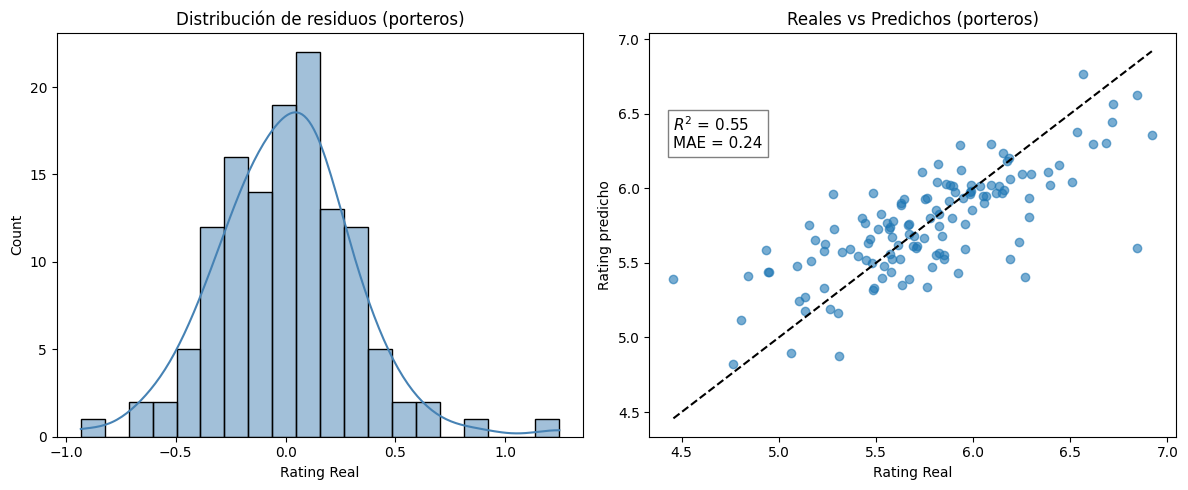

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir métricas relevantes para porteros
variables_portero = [
    "saves_per90",
    "save_percentage",
    "psxg_minus_goals_conceded_per90",
    "keeper_sweeper_per90",
    "penalty_save_percentage",
    "aerial_dominance_index_per90"
]

# Filtrar df_ratings solo para porteros (por partido)
df_porteros = df_ratings[df_ratings["main_position"] == "Goalkeeper"]

# Eliminar partidos sin alguna métrica
df_porteros = df_porteros[["original_rating"] + variables_portero].dropna()

# Imputar faltantes si los hubiera
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(df_porteros[variables_portero])
y = df_porteros["original_rating"]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelo
modelo = LinearRegression()
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)

# Métricas de evaluación
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"📊 R2 Score (porteros por partido): {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 MSE: {mse:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# Visualización
residuos = y - y_pred
plt.figure(figsize=(12, 5))

# Distribución de residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=20, color="steelblue")
plt.title("Distribución de residuos (porteros)")
plt.xlabel("Rating Real")

# Reales vs Predichos
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
plt.xlabel("Rating Real")
plt.ylabel("Rating predicho")
plt.title("Reales vs Predichos (porteros)")

# Añadir texto con R² y MAE
text_str = f"$R^2$ = {r2:.2f}\nMAE = {mae:.2f}"
plt.text(y.min(), y_pred.max() - 0.5, text_str, fontsize=11, bbox=dict(facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()



📊 Registros disponibles para centrales: 293
✅ R2 Score: 0.1030
📉 MAE: 0.2810
📉 MSE: 0.1363
📉 MAPE: 4.79%


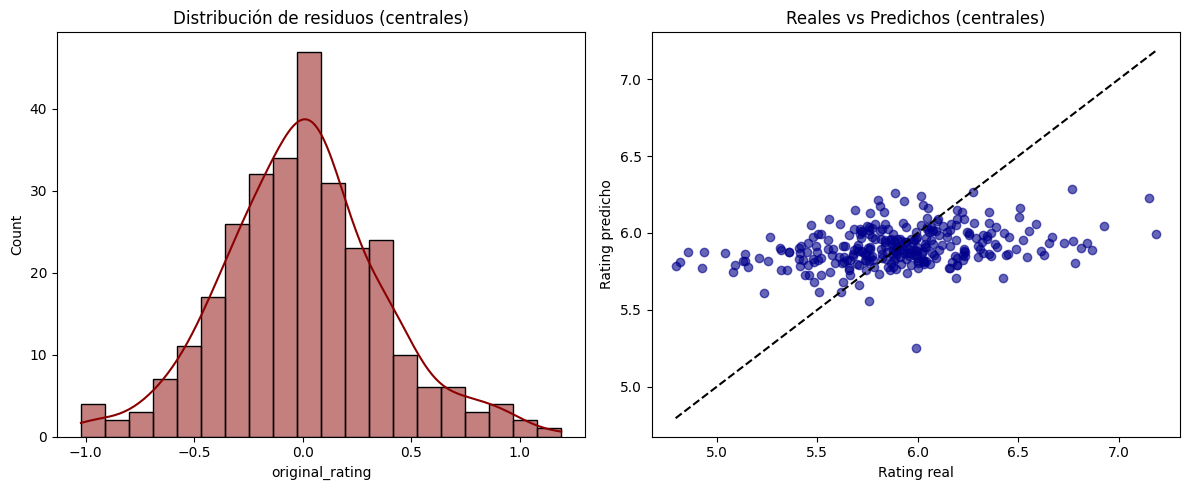

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Variables específicas para centrales
variables_centrales = [
    "tackle_success_rate",
    "interceptions_per90",
    "clearances_per90",
    "blocks_per90",
    "duels_won_per90",
    "times_dribbled_past_per90",
    "progressive_passes_per90"
]

# 2️⃣ Filtrar datos para centrales
etiquetas_centrales = ['Center Back', 'Right Center Back', 'Left Center Back']
df_centrales = df_ratings[df_ratings["main_position"].isin(etiquetas_centrales)].copy()

# 3️⃣ Eliminar registros con NaN
columnas_necesarias = ["original_rating"] + variables_centrales
df_centrales = df_centrales[columnas_necesarias].dropna()

print(f"📊 Registros disponibles para centrales: {len(df_centrales)}")

# 4️⃣ Preparar X e y
X = df_centrales[variables_centrales]
y = df_centrales["original_rating"]

# 5️⃣ Imputación por si acaso
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 6️⃣ Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 7️⃣ Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)

# 8️⃣ Métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 MSE: {mse:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# 9️⃣ Visualizaciones
residuos = y - y_pred
plt.figure(figsize=(12, 5))

# Histograma de residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=20, color="darkred")
plt.title("Distribución de residuos (centrales)")

# Reales vs predichos
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color="darkblue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
plt.xlabel("Rating real")
plt.ylabel("Rating predicho")
plt.title("Reales vs Predichos (centrales)")

plt.tight_layout()
plt.show()


📊 Registros disponibles para laterales: 249
✅ R2 Score: 0.0533
📉 MAE: 0.2705
📉 MSE: 0.1243
📉 MAPE: 4.66%


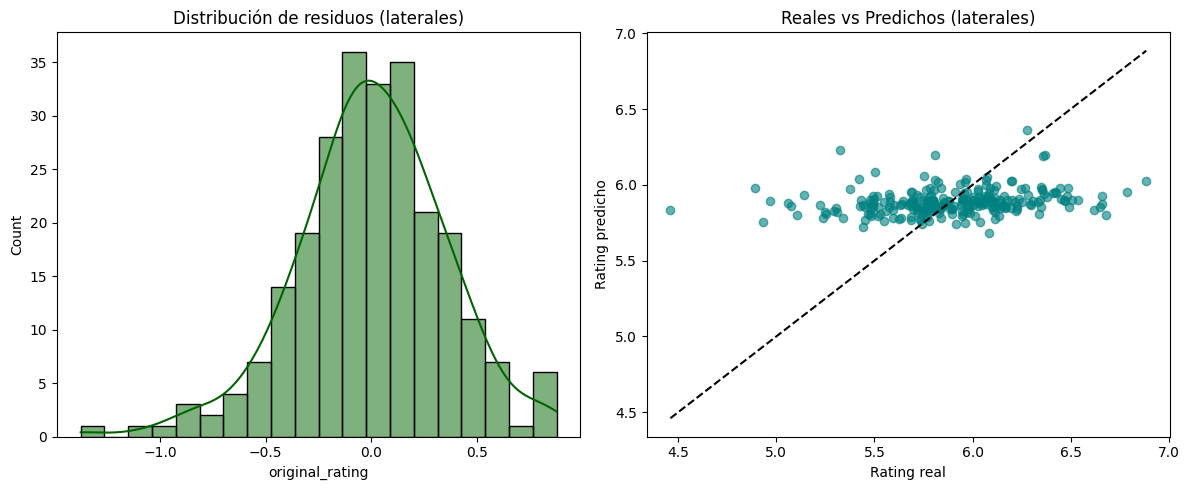

In [22]:

# 1️⃣ Variables específicas para laterales
variables_laterales = [
    "tackles_successful_per90",
    "interceptions_per90",
    "pressures_per90",
    "progressive_carries_per90",
    "crosses_completed_per90",
    "duels_won_per90",
    "fouls_committed_per90"
]

# 2️⃣ Filtrar datos para laterales
etiquetas_laterales = ['Left Back', 'Right Back', 'Right Wing Back', 'Left Wing Back']
df_laterales = df_ratings[df_ratings["main_position"].isin(etiquetas_laterales)].copy()

# 3️⃣ Eliminar registros con NaN
columnas_necesarias = ["original_rating"] + variables_laterales
df_laterales = df_laterales[columnas_necesarias].dropna()

print(f"📊 Registros disponibles para laterales: {len(df_laterales)}")

# 4️⃣ Preparar X e y
X = df_laterales[variables_laterales]
y = df_laterales["original_rating"]

# 5️⃣ Imputación
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 6️⃣ Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 7️⃣ Modelo
modelo = LinearRegression()
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)

# 8️⃣ Métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 MSE: {mse:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# 9️⃣ Visualización
residuos = y - y_pred
plt.figure(figsize=(12, 5))

# Histograma de residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=20, color="darkgreen")
plt.title("Distribución de residuos (laterales)")

# Reales vs predichos
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
plt.xlabel("Rating real")
plt.ylabel("Rating predicho")
plt.title("Reales vs Predichos (laterales)")

plt.tight_layout()
plt.show()


📊 Registros disponibles para mediocentros defensivos: 87
✅ R2 Score: 0.0465
📉 MAE: 0.3070
📉 MSE: 0.1478
📉 MAPE: 5.22%


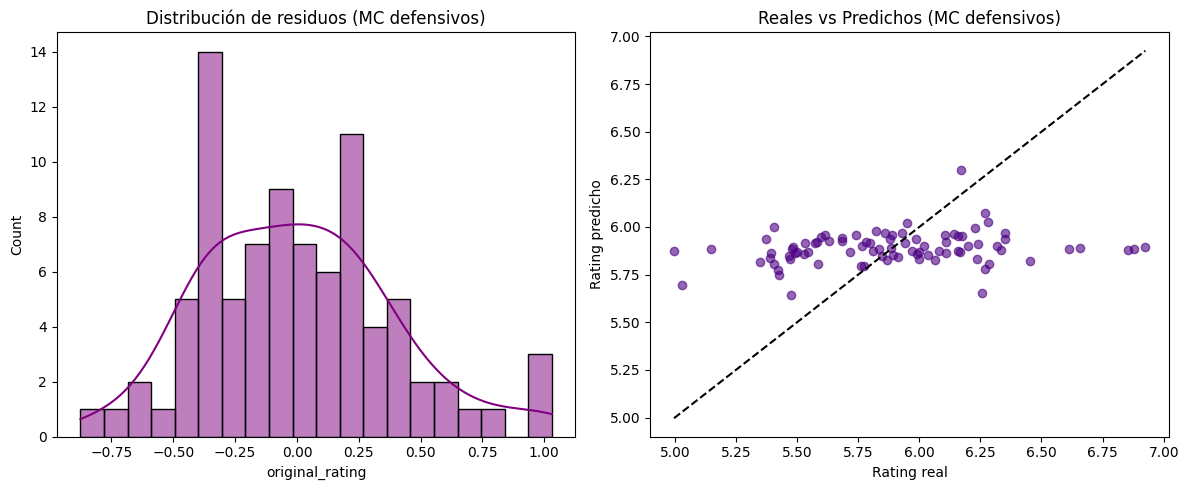

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Variables específicas para mediocentros defensivos
variables_mc_defensivo = [
    "interceptions_per90",
    "ball_recoveries_per90",
    "pressures_per90",
    "progressive_passes_per90",
    "duels_won_per90",
    "fouls_committed_per90"
]

# 2️⃣ Filtrar datos para mediocentros defensivos
etiquetas_mc_defensivo = [
    'Right Defensive Midfield',
    'Center Defensive Midfield',
    'Left Defensive Midfield'
]
df_mc_defensivo = df_ratings[df_ratings["main_position"].isin(etiquetas_mc_defensivo)].copy()

# 3️⃣ Eliminar registros con NaN
columnas_necesarias = ["original_rating"] + variables_mc_defensivo
df_mc_defensivo = df_mc_defensivo[columnas_necesarias].dropna()

print(f"📊 Registros disponibles para mediocentros defensivos: {len(df_mc_defensivo)}")

# 4️⃣ Preparar X e y
X = df_mc_defensivo[variables_mc_defensivo]
y = df_mc_defensivo["original_rating"]

# 5️⃣ Imputación
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 6️⃣ Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 7️⃣ Modelo
modelo = LinearRegression()
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)

# 8️⃣ Métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 MSE: {mse:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# 9️⃣ Visualización
residuos = y - y_pred
plt.figure(figsize=(12, 5))

# Histograma de residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=20, color="purple")
plt.title("Distribución de residuos (MC defensivos)")

# Reales vs predichos
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color="indigo")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
plt.xlabel("Rating real")
plt.ylabel("Rating predicho")
plt.title("Reales vs Predichos (MC defensivos)")

plt.tight_layout()
plt.show()


📊 Registros disponibles para mediocentros: 290
✅ R2 Score: 0.1381
📉 MAE: 0.2810
📉 MSE: 0.1386
📉 MAPE: 4.77%


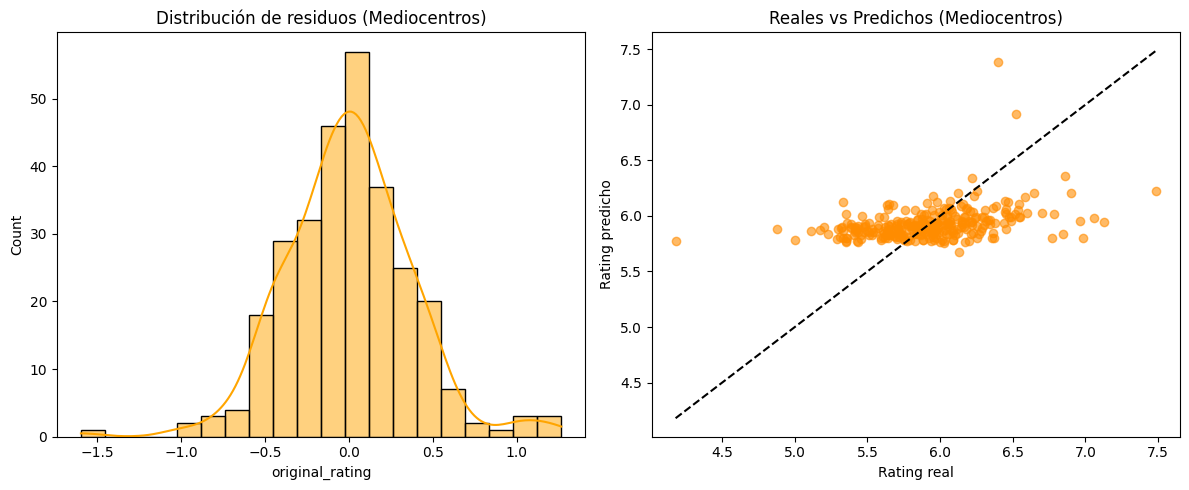

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Variables específicas para mediocentros
variables_mc = [
    "progressive_passes_per90",
    "chances_created_per90",
    "dribbles_completed_per90",
    "duels_total_per90",
    "pressures_per90"
]

# 2️⃣ Filtrar datos para mediocentros
etiquetas_mc = [
    'Right Center Midfield',
    'Center Midfield',
    'Left Center Midfield'
]
df_mc = df_ratings[df_ratings["main_position"].isin(etiquetas_mc)].copy()

# 3️⃣ Eliminar registros con NaN
columnas_necesarias = ["original_rating"] + variables_mc
df_mc = df_mc[columnas_necesarias].dropna()

print(f"📊 Registros disponibles para mediocentros: {len(df_mc)}")

# 4️⃣ Preparar X e y
X = df_mc[variables_mc]
y = df_mc["original_rating"]

# 5️⃣ Imputación
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 6️⃣ Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 7️⃣ Modelo
modelo = LinearRegression()
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)

# 8️⃣ Métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 MSE: {mse:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# 9️⃣ Visualización
residuos = y - y_pred
plt.figure(figsize=(12, 5))

# Histograma de residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=20, color="orange")
plt.title("Distribución de residuos (Mediocentros)")

# Reales vs predichos
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color="darkorange")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
plt.xlabel("Rating real")
plt.ylabel("Rating predicho")
plt.title("Reales vs Predichos (Mediocentros)")

plt.tight_layout()
plt.show()


📊 Registros disponibles para mediocentros ofensivos: 86
✅ R2 Score: 0.3408
📉 MAE: 0.2728
📉 MSE: 0.1106
📉 MAPE: 4.60%


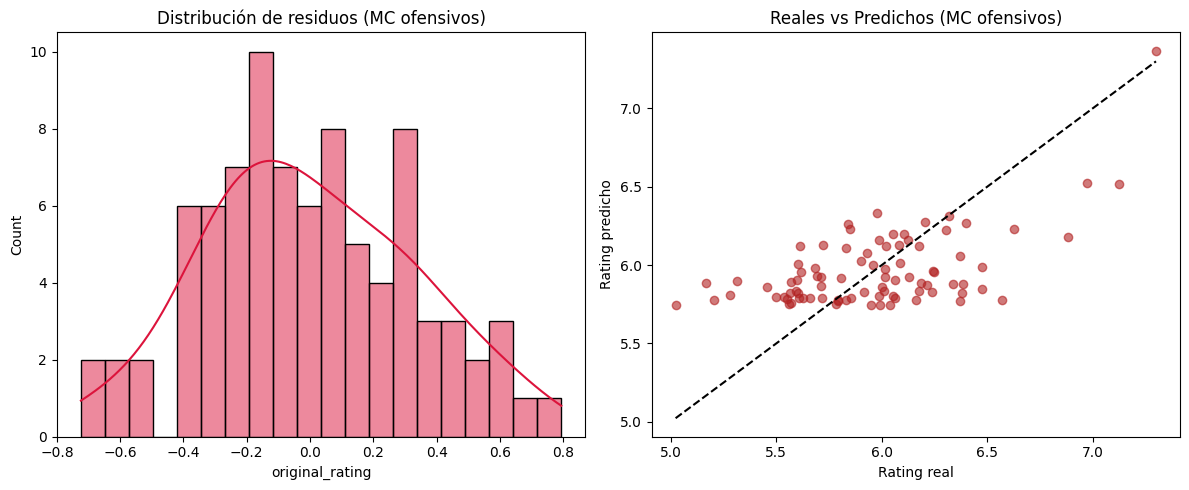

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Variables para mediocentros ofensivos
variables_mc_ofensivo = [
    "goal_assists_per90",
    "key_passes_per90",
    "progressive_passes_per90",
    "shots_total_per90",
    "xg_total_per90",
    "dribbles_completed_per90"
]

# 2️⃣ Filtrar jugadores por posición ofensiva de mediocampo
etiquetas_mc_ofensivo = [
    'Left Attacking Midfield',
    'Center Attacking Midfield',
    'Right Attacking Midfield'
]
df_mc_ofensivo = df_ratings[df_ratings["main_position"].isin(etiquetas_mc_ofensivo)].copy()

# 3️⃣ Eliminar registros con NaN
columnas_necesarias = ["original_rating"] + variables_mc_ofensivo
df_mc_ofensivo = df_mc_ofensivo[columnas_necesarias].dropna()

print(f"📊 Registros disponibles para mediocentros ofensivos: {len(df_mc_ofensivo)}")

# 4️⃣ Preparar X e y
X = df_mc_ofensivo[variables_mc_ofensivo]
y = df_mc_ofensivo["original_rating"]

# 5️⃣ Imputación
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 6️⃣ Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 7️⃣ Modelo
modelo = LinearRegression()
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)

# 8️⃣ Métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 MSE: {mse:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# 9️⃣ Visualización
residuos = y - y_pred
plt.figure(figsize=(12, 5))

# Histograma de residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=20, color="crimson")
plt.title("Distribución de residuos (MC ofensivos)")

# Reales vs predichos
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color="firebrick")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
plt.xlabel("Rating real")
plt.ylabel("Rating predicho")
plt.title("Reales vs Predichos (MC ofensivos)")

plt.tight_layout()
plt.show()


📊 Registros disponibles para extremos: 447
✅ R2 Score: 0.1432
📉 MAE: 0.2930
📉 MSE: 0.1532
📉 MAPE: 4.94%


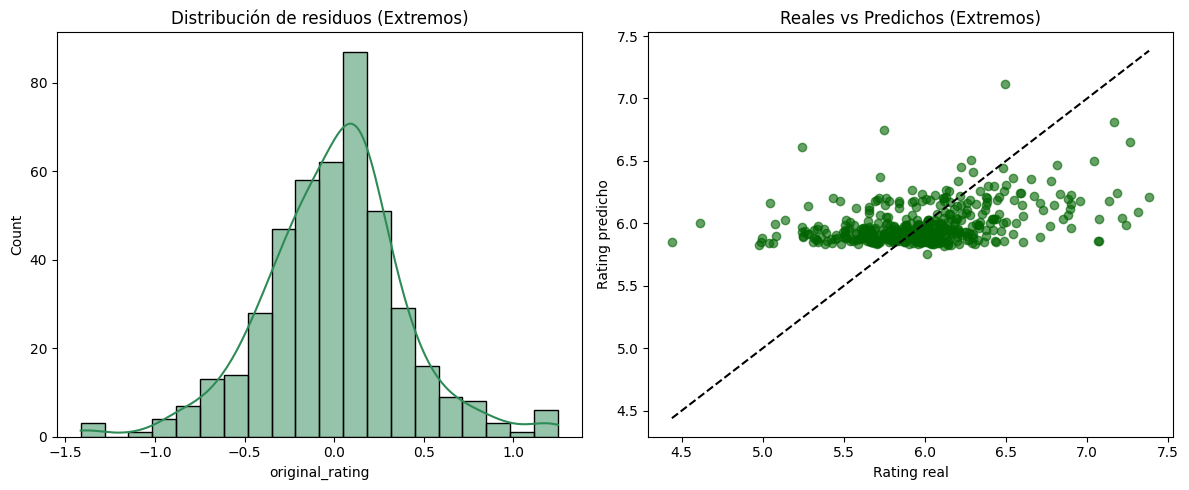

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Variables para extremos
variables_extremos = [
    "dribbles_completed_per90",
    "crosses_completed_per90",
    "key_passes_per90",
    "goal_assists_per90",
    "progressive_carries_per90",
    "xg_total_per90"
]

# 2️⃣ Filtrar jugadores extremos
etiquetas_extremos = [
    'Left Center Forward', 'Right Center Forward',
    'Left Wing', 'Left Midfield',
    'Right Wing', 'Right Midfield'
]
df_extremos = df_ratings[df_ratings["main_position"].isin(etiquetas_extremos)].copy()

# 3️⃣ Eliminar registros con NaN
columnas_necesarias = ["original_rating"] + variables_extremos
df_extremos = df_extremos[columnas_necesarias].dropna()

print(f"📊 Registros disponibles para extremos: {len(df_extremos)}")

# 4️⃣ Preparar X e y
X = df_extremos[variables_extremos]
y = df_extremos["original_rating"]

# 5️⃣ Imputación
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 6️⃣ Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 7️⃣ Modelo
modelo = LinearRegression()
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)

# 8️⃣ Métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 MSE: {mse:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# 9️⃣ Visualización
residuos = y - y_pred
plt.figure(figsize=(12, 5))

# Histograma de residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=20, color="seagreen")
plt.title("Distribución de residuos (Extremos)")

# Reales vs predichos
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color="darkgreen")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
plt.xlabel("Rating real")
plt.ylabel("Rating predicho")
plt.title("Reales vs Predichos (Extremos)")

plt.tight_layout()
plt.show()


📊 Registros disponibles para delanteros centro: 125
✅ R2 Score: 0.2181
📉 MAE: 0.2794
📉 MSE: 0.1308
📉 MAPE: 4.76%


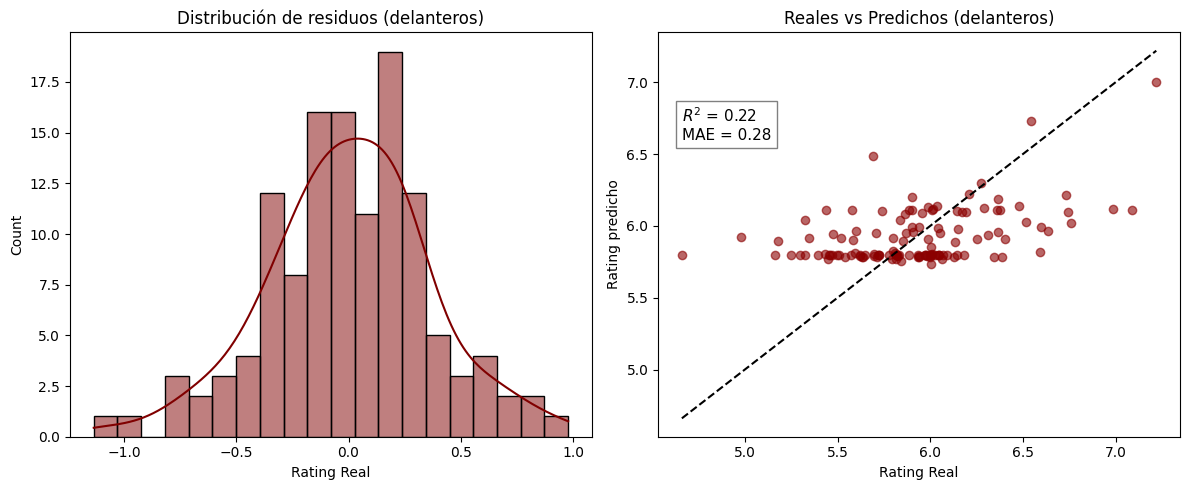

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Variables específicas para delanteros centro
variables_delanteros = [
    "xg_total_per90",
    "shot_accuracy",
    "goal_assists_per90",
    "penalties_won_per90",
    "key_passes_per90"
]

# 2️⃣ Filtrar jugadores delanteros
etiquetas_delanteros = ['Center Forward', 'Secondary Striker']
df_delanteros = df_ratings[df_ratings["main_position"].isin(etiquetas_delanteros)].copy()

# 3️⃣ Eliminar registros con NaN
columnas_necesarias = ["original_rating"] + variables_delanteros
df_delanteros = df_delanteros[columnas_necesarias].dropna()

print(f"📊 Registros disponibles para delanteros centro: {len(df_delanteros)}")

# 4️⃣ Preparar X e y
X = df_delanteros[variables_delanteros]
y = df_delanteros["original_rating"]

# 5️⃣ Imputación
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 6️⃣ Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 7️⃣ Modelo
modelo = LinearRegression()
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)

# 8️⃣ Métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 MSE: {mse:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# 9️⃣ Visualización
residuos = y - y_pred
plt.figure(figsize=(12, 5))

# Histograma de residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=20, color="maroon")
plt.title("Distribución de residuos (delanteros)")
plt.xlabel("Rating Real")

# Reales vs predichos
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color="darkred")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
plt.xlabel("Rating Real")
plt.ylabel("Rating predicho")
plt.title("Reales vs Predichos (delanteros)")

# Añadir texto con R² y MAE
text_str = f"$R^2$ = {r2:.2f}\nMAE = {mae:.2f}"
plt.text(y.min(), y_pred.max() - 0.4, text_str, fontsize=11, bbox=dict(facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()

